In [ ]:
Seun OLORUNTOBA

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [69]:
wind_ML= pd.read_csv("wind_generation_data.csv")

In [70]:
wind_ML.head()

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35
3,15.73,218,39.37
4,15.64,218,33.22


In [71]:
wind_ML.keys()

Index(['wind speed', 'direction', 'Power Output'], dtype='object')

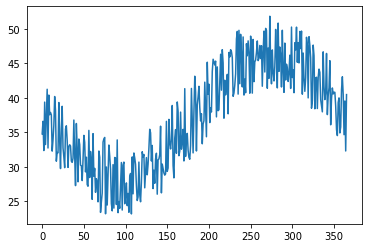

In [72]:
wind_ML["Power Output"].plot()

In [73]:
wind_ML.isnull().sum()

wind speed      0
direction       0
Power Output    0
dtype: int64

In [74]:
wind_ML.shape

(366, 3)

In [75]:
wind_ML.describe()

,wind speed,direction,Power Output
count,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607
std,3.743556,4.462796,7.243363
min,7.450000,209.000000,23.170000
25%,13.000000,218.000000,31.352500
50%,15.530000,220.000000,37.525000
75%,18.802500,222.000000,42.925000
max,22.710000,234.000000,51.810000


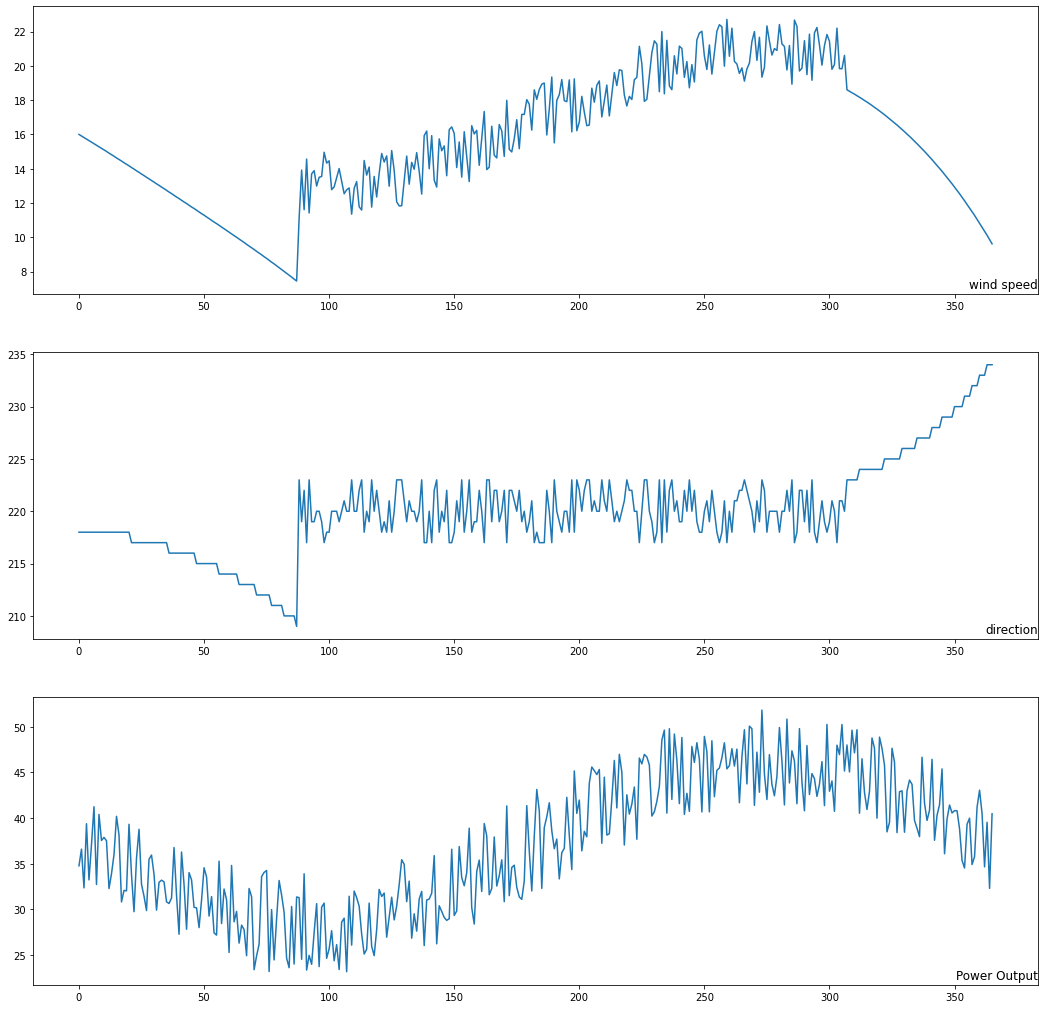

In [76]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(wind_ML.columns)):
    plt.subplot(len(wind_ML.columns), 1, i+1)
    name = wind_ML.columns[i]
    plt.plot(wind_ML[name])
    plt.title(name, y=0, loc = 'right')
plt.show()


In [77]:
wind_ML.tail()

,wind speed,direction,Power Output
361,10.59,233,40.49
362,10.36,233,34.65
363,10.12,234,39.53
364,9.87,234,32.29
365,9.62,234,40.46


In [78]:
wind_ML.dtypes

wind speed      float64
direction         int64
Power Output    float64
dtype: object

In [79]:
n = len(wind_ML)
train_df = wind_ML[0:int(n*0.8)]
test_df = wind_ML[int(n*0.8):]

num_features = wind_ML.shape[1]

In [80]:
train_df

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35
3,15.73,218,39.37
4,15.64,218,33.22
...,...,...,...
287,22.30,218,41.56
288,19.70,222,49.78
289,19.86,222,43.92
290,21.47,219,40.78


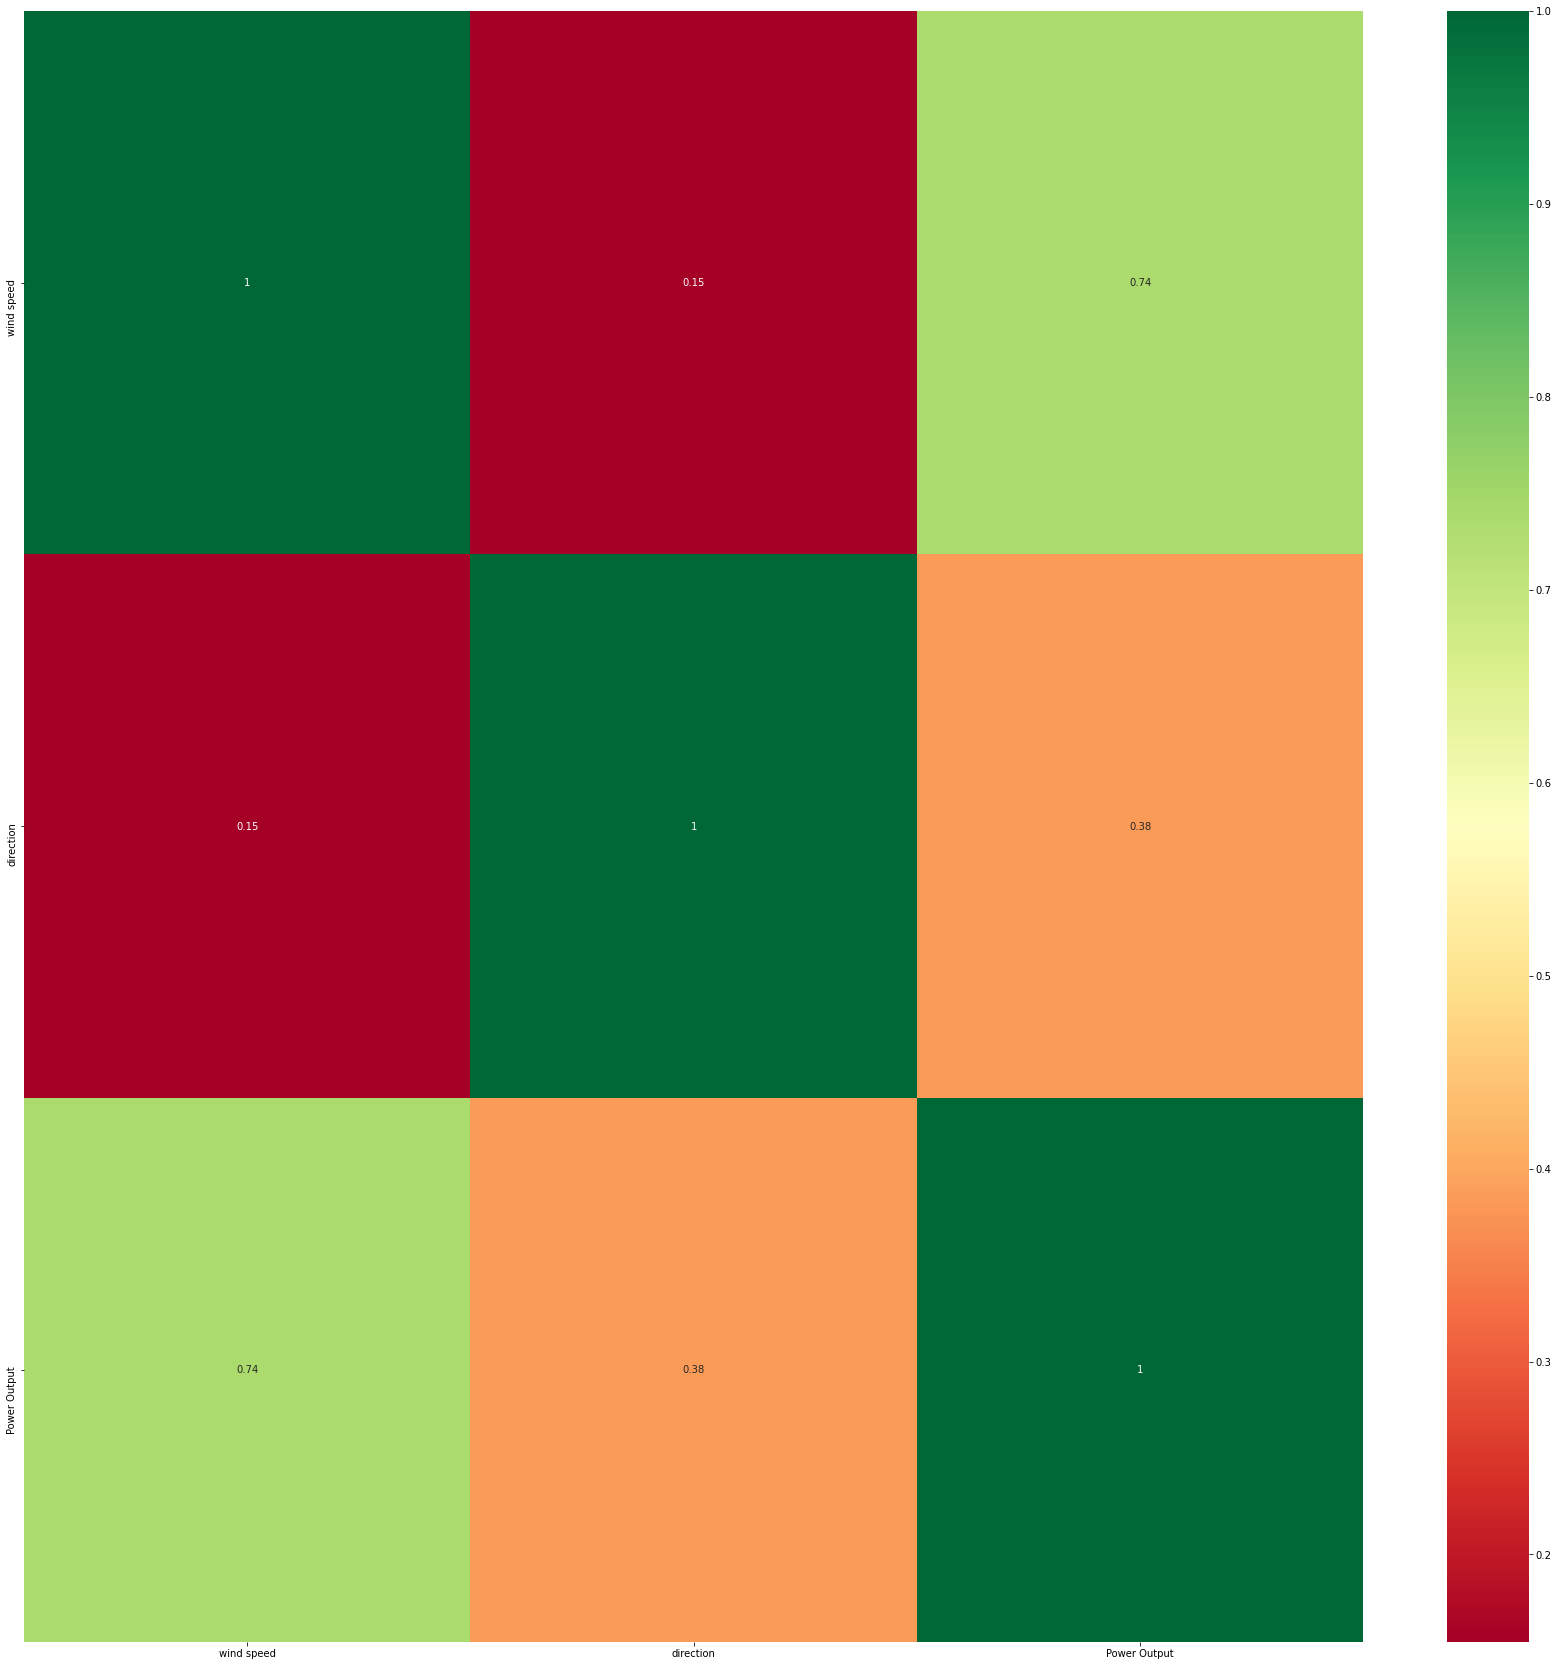

In [81]:
corr = wind_ML.corr()
top_corr_features = corr.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(wind_ML[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [82]:
y_training = train_df.pop("Power Output")

In [83]:
y_training.head()

0    34.76
1    36.59
2    32.35
3    39.37
4    33.22
Name: Power Output, dtype: float64

In [84]:
X_training = train_df
X_training.head()

,wind speed,direction
0,16.00,218
1,15.91,218
2,15.82,218
3,15.73,218
4,15.64,218


In [85]:
y_test = test_df.pop("Power Output")

In [86]:
X_test = test_df

In [87]:
column_trans = make_column_transformer(
    (StandardScaler(),['wind speed','direction']),
    remainder = 'passthrough')

In [88]:
linreg = LinearRegression()


In [89]:
pca = PCA()
pipeline_linreg = Pipeline(steps=[('transform',column_trans),('pca', pca), ('linear', linreg)])

In [90]:
pipeline_linreg.fit(X_training, y_training)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['wind speed',
                                                   'direction'])])),
                ('pca', PCA()), ('linear', LinearRegression())])

In [91]:
y_train_pred = pipeline_linreg.predict(X_training)



In [92]:
mean_absolute_error(y_training, y_train_pred)

3.5714246724350605

In [93]:
y_test_pred = pipeline_linreg.predict(X_test)

In [94]:
mean_absolute_error(y_test, y_test_pred)

6.742738756701406

In [95]:
import pickle
with open('wind_data.pkl','wb') as f:
    pickle.dump(pipeline_linreg, f)

In [96]:
rf_pickle = pickle.load(open('wind_data.pkl','rb'))
y_test_pred = rf_pickle.predict(X_test)
print(y_test_pred)

[45.68293228 41.07552396 45.79198177 46.37385219 44.61812844 42.61314874
 44.55581445 45.65177529 44.94527689 42.2392648  42.75882122 46.3115382
 42.30157879 42.28600029 43.58448159 40.2031281  40.07850012 39.93829364
 39.81366566 39.67345918 39.4498942  39.30968773 39.15390275 39.01369627
 38.8579113  38.70212632 38.53076285 38.37497787 38.2036144  38.03225093
 37.77752896 37.59058699 37.40364502 37.21670305 37.02976108 36.84281911
 36.64029864 36.35441967 36.1518992  35.93380024 35.73127977 35.51318081
 35.27950334 34.97804588 34.74436842 34.51069095 34.27701349 34.02775753
 33.77850157 33.44588711 33.18105265 32.9162182  32.65138374 32.30319078
 32.02277783 31.74236487 31.46195192 31.16596046 30.78661051 30.47504056
 30.17904911 29.86747916 29.45697221 29.12982376 28.80267532 28.39216837
 28.04944142 27.69113598 27.24947204 26.8911666  26.53286115 26.07561871
 25.68615628 25.29669384]


In [97]:
print(y_test)
mean_absolute_error(y_test, y_test_pred)

292    42.57
293    44.86
294    44.31
295    42.36
296    43.69
       ...  
361    40.49
362    34.65
363    39.53
364    32.29
365    40.46
Name: Power Output, Length: 74, dtype: float64


6.742738756701406

In [98]:

cols = ['Day','Month','Temp Hi', 'Temp Low', 'Solar', 'Cloud Cover Percentage', 'Rainfall in mm']
data = pd.DataFrame([[2,1,120,71,37.1,9,1.0]], columns=cols)